In [1]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt

In [2]:
data24 = pd.read_excel('data/PERM_Disclosure_Data_FY24.xlsx')
len(data24)
###BASICS
#CASE_NUMBER
#CASE_STATUS
#REFILE
#COUNTRY_OF_CITIZENSHIP

###JOB
#EMPLOYER_STATE
#NAICS_CODE: industry code
#WAGE_OFFER_FROM
#WORKSITE_POSTAL_CODE
#JOB_TITLE

###EDUCATION
#MAJOR_FIELD_OF_STUDY
#REQUIRED_EXPERIENCE
#REQUIRED_TRAINING_FIELD
#SPECIFIC_SKILLS
#FOREIGN_WORKER_EDUCATION
#FOREIGN_WORKER_REQ_EXPERIENCE

###HOW THEY GOT THE JOB
#ON_CAMPUS_RECRUITING_FROM_DATE
#PRO_ORG_ADVERTISEMENT_TO_DATE

92258

In [3]:
data24['FOREIGN_WORKER_INST_OF_ED'].value_counts()

FOREIGN_WORKER_INST_OF_ED
ANNA UNIVERSITY                                               1557
JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY                     1406
UNIVERSITY OF SOUTHERN CALIFORNIA                              994
CARNEGIE MELLON UNIVERSITY                                     797
NORTHEASTERN UNIVERSITY                                        789
                                                              ... 
BRUNEL UNIVERSITY                                                1
HIGHER STUDIES OF INFORMATION AND COMMUNICATION TECHNOLOGY       1
UNIVERSITY CENTER FOR MACROECONOMIC STUDIES OF ARGENTINA         1
DEVRY UNIVERSITYS KELLER GRADUATE SCHOOL OF MANAGEMENT           1
UNIVERSIDAD DE LA SALLE BAJO                                     1
Name: count, Length: 15615, dtype: int64

In [9]:
postal_codes = data24['EMPLOYER_CITY'].value_counts()
postal_codes

EMPLOYER_CITY
NEW YORK         4620
SEATTLE          4061
SANTA CLARA      2440
MOUNTAIN VIEW    2358
REDMOND          1749
                 ... 
Jurupa Valley       1
SOUTH AMBOY         1
ST. EDWARD          1
Carrboro            1
Cocoa               1
Name: count, Length: 4989, dtype: int64

In [13]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Sample city names in a Pandas Series
city_series = postal_codes

# Initialize geolocator
geolocator = Nominatim(user_agent="geo_map")

# Function to get latitude and longitude
def get_coordinates(city):
    try:
        location = geolocator.geocode(city, timeout=10)
        if location:
            return location.latitude, location.longitude
    except GeocoderTimedOut:
        return None
    return None

# Get coordinates for each city
city_coords = city_series.apply(get_coordinates)

# Initialize world map centered around (0, 0)
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add city markers to the map
for city, coords in zip(city_series, city_coords):
    if coords:
        folium.Marker(
            location=coords,
            popup=city,
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(world_map)

# Save and display map
world_map.save("world_map.html")
print("Map saved as world_map.html. Open it in a browser.")


Map saved as world_map.html. Open it in a browser.


In [54]:
for postal_code, coord in zip(postal_codes, coordinates):
    if coord:
        folium.Marker(coord, popup=f"Postal Code: {postal_code}").add_to(m)
m

In [8]:
data24['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
AMAZON.COM SERVICES LLC                      2151
MICROSOFT CORPORATION                        1703
GOOGLE LLC                                   1616
TATA CONSULTANCY SERVICES LIMITED            1467
APPLE INC.                                   1415
                                             ... 
TURLOCK RV CENTER, INC DBA BEST RV CENTER       1
GUAM HEALTHCARE DEVELOPMENT, INC.               1
BRADESCO BAC FLORIDA INVESTMENT CORP            1
Administer Co                                   1
SUPERIOR BREAD CO.                              1
Name: count, Length: 22229, dtype: int64

In [15]:
data24[(data24["EMPLOYER_NAME"] == 'GOOGLE LLC') & (data24['COUNTRY_OF_CITIZENSHIP'] == 'TAIWAN')]

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE
571,A-22298-45472,Certified-Expired,2022-11-16,2023-10-03,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,Y,N,N,Y,N,Sebastien Vertus,Attorney,GoogleDOL@bal.com,BoshionJillGinaAmyPeter CrandallMurdockXenaki...,Program Managers
581,A-22312-53847,Certified-Expired,2022-11-22,2023-10-03,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,Y,N,N,Y,N,Claudia Areyzaga,Attorney,GoogleDOL@bal.com,Gina Xenakis,Program Manager
1008,A-22290-40826,Certified-Expired,2022-11-18,2023-10-04,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,Y,N,N,Y,N,Alexis Russell,Associate Attorney,GoogleDOL@bal.com,BoshionJillGinaAmyPeter CrandallMurdockXenaki...,Program Managers
1449,A-22287-40067,Certified-Expired,2022-11-14,2023-10-05,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,Y,N,N,Y,N,Alexis Russell,Associate Attorney,GoogleDOL@bal.com,BoshionJillGinaAmyPeter CrandallMurdockXenaki...,Program Managers
2003,A-22305-49609,Certified-Expired,2022-11-18,2023-10-06,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,Y,N,N,Y,N,Tracy Taylor,Associate Attorney,GoogleDOL@bal.com,BoshionJillGinaAmyPeter CrandallMurdockXenaki...,Program Managers
2463,A-22276-32241,Certified-Expired,2022-11-14,2023-10-10,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,N,N,N,Y,N,Tracy Taylor,Associate Attorney,GoogleDOL@bal.com,BoshionJillGinaAmyPeter CrandallMurdockXenaki...,Program Managers
2523,A-22320-58510,Certified-Expired,2022-11-22,2023-10-10,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,N,N,N,Y,N,Mengying Wu,Associate Attorney,GoogleDOL@bal.com,BoshionJillGinaAmyPeter CrandallMurdockXenaki...,Program Managers
5154,A-22257-21267,Certified-Expired,2022-11-02,2023-10-17,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,Y,N,N,Y,N,Yusuf Mansaray,Associate Attorney,GoogleDOL@bal.com,BoshionJillGinaAmyPeter CrandallMurdockXenaki...,Program Managers
5163,A-22269-28295,Certified-Expired,2022-11-03,2023-10-17,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,N,N,N,Y,N,Alexis Russell,Associate Attorney,GoogleDOL@bal.com,BoshionJillGinaAmyPeter CrandallMurdockXenaki...,Program Managers
5179,A-22280-35571,Certified-Expired,2022-11-28,2023-10-17,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,N,N,N,Y,N,David Hicks,Associate Attorney,GoogleDOL@bal.com,BoshionJillGinaAmyPeter CrandallMurdockXenaki...,Program Managers


In [17]:
data24['MAJOR_FIELD_OF_STUDY'].value_counts()

MAJOR_FIELD_OF_STUDY
See H.14                                                                                        7462
Computer Science                                                                                7444
Comp Sci, MIS, Engg (any), Math, Bus Admin,or rel quantitative field                            1463
See Section H.14 of the 9089                                                                    1240
Business Administration                                                                          819
                                                                                                ... 
Data Analytics, Statistics, Computational Science, Business Administration, or related field       1
Business, Marketing, or Related Field                                                              1
Accounting, Finance, Business Administration, Taxation, or related field.                          1
finance or market research                                            

In [23]:
employer_name_series = data24['EMPLOYER_NAME'].value_counts()
employer_name_series.index

Index(['AMAZON.COM SERVICES LLC', 'MICROSOFT CORPORATION', 'GOOGLE LLC',
       'TATA CONSULTANCY SERVICES LIMITED', 'APPLE INC.',
       'COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION', 'INTEL CORPORATION',
       'Management Health Systems, LLC DBA MedPro', 'WAYNE FARMS LLC',
       'AMAZON WEB SERVICES, INC.',
       ...
       'Bluefin Payment Systems LLC.', 'FACTOR SALES INC  DBA DELSOL MARKET',
       'NW Services CO. dba Aquanima', '246 THAI EXPRESS, INC', 'BADANG INC',
       'TURLOCK RV CENTER, INC DBA BEST RV CENTER',
       'GUAM HEALTHCARE DEVELOPMENT, INC.',
       'BRADESCO BAC FLORIDA INVESTMENT CORP', 'Administer Co',
       'SUPERIOR BREAD CO.'],
      dtype='object', name='EMPLOYER_NAME', length=22229)

<BarContainer object of 20 artists>

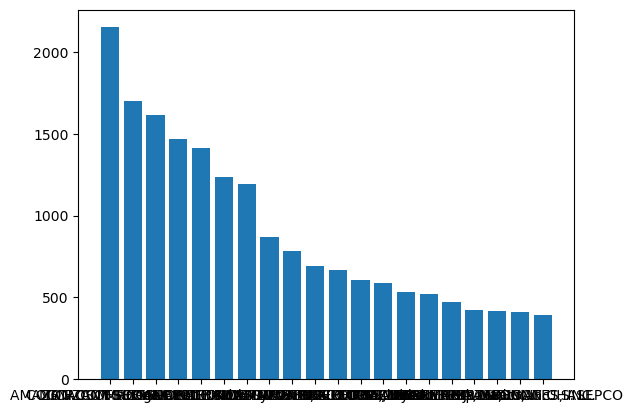

In [25]:
employer_name = employer_name_series.index
employee_count = employer_name_series.values
plt.bar(employer_name[:20], employee_count[:20])

In [36]:
shannon_df = pd.read_csv("shannon.csv")
shannon_df = shannon_df[['Sum of Custom', 'Unnamed: 171']]
shannon_df

/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_75909/1774038785.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,33,34,35,36,37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169) have mixed types. Specify dtype option on import or set low_memory=False.
  shannon_df = pd.read_csv("shannon.csv")


,Sum of Custom,Unnamed: 171
0,Row Labels,Shannon
1,10137770,0.003506958
2,10211501,0.007730273
3,10211513,0.006259237
4,10233346,0.015625594
...,...,...
7117,990378846,0.129965096
7118,990381313,0.381719537
7119,990385461,0.018384007
7120,996000354,0.001763644
